# Telco Customer Churn Classification

Focuses On :
- Performing exploratary data analysis for identifying important features
- Encoding categorical variables to use them in ML models
- Using Logistic Regression for classfication

## Initial Preparation

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('Hariz_Customer_Telco.csv')

In [4]:
len(df)

7043

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Problem :
- Senior Citizen is of type "integer"
- TotalCharges is not correctly identified as a numeric type (float or int)

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.churn = (df.churn == 'yes').astype(int)

In [11]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split test and train data

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

#Sets the random seed when doing the split to make sure that every time we run the code, the result is the same
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

#Takes the column with the target variable, churn, and saves it outside the dataframe
y_train = df_train.churn.values
y_val = df_val.churn.values

In [14]:
# Deletes the churn columns from both dataframes to make sure we don’t accidentally use the churn variable as a feature during training

del df_train['churn'] 
del df_val['churn'] 

## Exploratory data analysis

In [15]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

It prints all zeros, so we have no missing values in the dataset and don’tneed to do anything extra

In [16]:
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

The first column is the value of the target variable, and the second is the count. As we see, the majority of the customers didn’t churn. 

In [18]:
#Calculating the global churn rate in the training dataset

global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [19]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

Both the categorical and numerical variables in our dataset are important, but they are also different and need different treatment.
-  [categorical], which will contain the names of categorical variables
-  [numerical], which, likewise, will have the names of numerical variables

In [20]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance

Feature importance refers to a technique used in machine learning to determine the most important features in a dataset when building a predictive model. It is important because it can help identify the features that are most influential in making predictions, which can inform feature selection and model development.

There are several ways to determine feature importance, including:

- Coefficient values in a linear regression model
- Tree-based methods, such as using the feature importance scores in decision trees or random forests
- Permutation importance, which involves randomly shuffling the values of a single feature and measuring the effect on the model's performance

Determining feature importance can help improve the interpretability of a model by providing insight into which features are driving the predictions. It can also help identify potential biases in the data or improve the performance of the model by focusing on the most important features.

The Question for analysis data

- What makes customers churn?
- What are the characteristics of people who churn?

In [22]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.277
gender == male:   0.263


^ The dataframe is split by the values of the gender variable into two groups: 
a group with gender == "female" and a group with gender == "male".

In [23]:
female_mean / global_mean

1.0253955354648652

In [24]:
male_mean / global_mean

0.9749802969838747

When we execute this code and check the results, we see that the churn rate of female customers is 27.7% and that of male customers is 26.3%, whereas the global churn rate is 27%.

In [25]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes: 0.205
partner == no : 0.33


In [26]:
partner_yes / global_mean

0.7594724924338315

In [27]:
partner_no / global_mean

1.2216593879412643

### Risk Ratio

In [28]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


The churn rate for the gender variable. We see that for both values, the 
difference between the group churn rate and the global churn rate is not very large.The churn rate for the gender variable. We see that for both values, the 
difference between the group churn rate and the global churn rate is not very large.

In [30]:
from IPython.display import display

global_mean = df_train_full.churn.mean()
global_mean

for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


From the results :
- For gender, there is not much difference between females and males. Both means are approximately the same, and for both groups the risks are close to 1.

-  Senior citizens tend to churn more than nonseniors: the risk of churning is 1.53 for seniors and 0.89 for nonseniors.

-  People with a partner churn less than people with no partner. The risks are 0.75 and 1.22, respectively.

-  People who use phone service are not at risk of churning: the risk is close to 1, and there’s almost no difference with the global churn rate. People who don’t use phone service are even less likely to churn: the risk is below 1, and the difference with the global churn rate is negative.

-  Clients with no tech support tend to churn more than those who do.

-  People with monthly contracts cancel the contract a lot more often than others, and people with two-year contacts churn very rarely. 


### Mutual Information

- In machine learning, mutual information is a measure of the mutual dependence between two variables. It can be used to assess the relationship between features in a dataset and the target variable when building a predictive model.

- Mutual information is a non-parametric measure of dependence that is based on the entropy of the variables. It is a measure of the reduction in uncertainty about one variable given knowledge of the other.

- Overall, mutual information can be a useful tool for understanding the relationships between variables in a dataset and for improving the performance of machine learning models.

There are several potential uses of mutual information in machine learning:

- Feature selection: Mutual information can be used to identify the most relevant features in a dataset for a given task.

- Information theory: Mutual information is a fundamental concept in information theory and can be used to measure the amount of information that one variable contains about another.

- Unsupervised learning: Mutual information can be used as a criterion for clustering, as it can capture the dependence between variables.

- Exploratory data analysis: Mutual information can be used to identify relationships between variables in a dataset, which can be helpful for understanding the underlying structure of the data.

In [33]:
from sklearn.metrics import mutual_info_score

# creates a stand-alone function for calculating mutual information
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923


,MI
partner,0.009968
seniorcitizen,0.009410
multiplelines,0.000857
phoneservice,0.000229
gender,0.000117


(First)
- The most useful features according to the mutual information score

(Second)
- The least useful features according to the mutual information score


### CORRELATION COEFFICIENT

- In machine learning, the correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. It is a statistical measure that ranges from -1 to 1, where a value of 1 indicates a strong positive relationship, a value of -1 indicates a strong negative relationship, and a value of 0 indicates no relationship.

- Mutual information is a way to quantify the degree of dependency between two categorical variables, but it doesn’t work when one of the features is numerical, so we cannot apply it to the three numerical variables that we have. 

In [34]:
df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [35]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


How to read :
-  Positive correlation means that when one variable goes up, the other variable
tends to go up as well. In the case of a binary target, when the values of the variable are high, we see ones more often than zeros. But when the values of the
variable are low, zeros become more frequent than ones.
- Zero correlation means no relationship between two variables: they are completely independent.
-  Negative correlation occurs when one variable goes up and the other goes
down. In the binary case, if the values are high, we see more zeros than ones in
the target variable. When the values are low, we see more ones

## Feature engineering

We had an initial look at the data and identified what could be useful for the model.
After doing that, we have a clear understanding how other variables affect churn —
our target. 
Before we proceed to training, however, we need to perform the feature engineering step: transforming all categorical variables to numeric features. We’ll do
that in the next section, and after that, we’ll be ready to train the logistic regression
model.

### Use One-Hot Encodin for Categorical Variables

In [37]:
from sklearn.feature_extraction import DictVectorizer

In [1]:
# Convert our dataframe to a list of dictionaries
train_dict = df_train[categorical + numerical].to_dict(orient='records')

NameError: name 'df_train' is not defined

In [39]:
train_dict[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 71,
 'monthlycharges': 86.1,
 'totalcharges': 6045.9}

In [40]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

DictVectorizer is a transformer in scikit-learn that converts a collection of dictionaries, or a dictionary-like object, to a NumPy array or sparse matrix. The resulting matrix is a sparse matrix if the input is a collection of dictionaries, and a dense matrix if the input is a dictionary-like object.

In [41]:
X_train = dv.transform(train_dict)

In [42]:
X_train.shape

(3774, 45)

In [43]:
dv.get_feature_names()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

## Training logistic regression

Logistic regression is a supervised learning algorithm for classification. It is used to predict the probability of a binary outcome (i.e., an outcome with two possible values, such as a coin flip) given a set of predictor variables.

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [3]:
# Perform one-hot encoding in same way as above
val_dict = df_val[categorical + numerical].to_dict(orient='records')

# Instead of fit and then transform, we use transform, which we fit previously
X_val = dv.transform(val_dict)

NameError: name 'df_val' is not defined

In [47]:
model.predict_proba(X_val)

array([[0.76508418, 0.23491582],
       [0.73111993, 0.26888007],
       [0.68054547, 0.31945453],
       ...,
       [0.94274351, 0.05725649],
       [0.38476714, 0.61523286],
       [0.93872772, 0.06127228]])

Prediction : 
- The first column contains the probability that the target is zero (the client won’t churn).
- The second column contains the opposite probability (the target is one, and the client will churn)


In [48]:
y_pred = model.predict_proba(X_val)[:, 1]

Notes :
- : mean select all rows
- 1 , mean select only column at index 1

In [49]:
y_pred

array([0.23491582, 0.26888007, 0.31945453, ..., 0.05725649, 0.61523286,
       0.06127228])

In [50]:
churn = y_pred > 0.5

Notes : 
 To get the binary predictions, we take the probabilities and cut them above a certain threshold. If the probability for a customer is higher than this threshold, we predict churn, otherwise, not churn. If we select 0.5 to be this threshold, making the
binary predictions is easy. We just use the “>=” operator

In [51]:
(y_val == churn).mean()

0.8016129032258065

Notes :
- Target data : 1 if customer churns, 0 if not ( y_val)
- Predictions : True if we think the customer churns, Fales if we think they won't
- 0.80 means that the model predictions matchted the actual value 80% all the time, make correct prediction of 80%

## Model interpretation

In [52]:
model.intercept_[0]

-0.12198925718752648

In [53]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


In [54]:
subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names()

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'tenure',
 'totalcharges']

In [55]:
model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [56]:
model_small.intercept_[0]

-0.6384451262176045

the bias term has the value of –0.639. This value is negative. If we look
at the sigmoid function, we can see that for negative values, the output is lower than
0.5 (figure 3.31). For –0.639, the resulting probability of churning is 34%. This means
that on average, a customer is more likely to stay with us than churn.

In [57]:
dict(zip(dv_small.get_feature_names(), model_small.coef_[0].round(3)))

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.909,
 'contract=one_year': -0.145,
 'contract=two_year': -1.403,
 'tenure': -0.097,
 'totalcharges': 0.001}

In [58]:
val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

In [59]:
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

Notes:
- We start with the baseline score. It’s the bias term with the value of –0.639.
- Because it’s a month-to-month contract, we add 0.91 to this value and get 0.271.
Now the score becomes positive, so it may mean that the client is going to
churn. We know that a monthly contract is a strong indicator of churning. 
-  Next, we consider the tenure variable. For each month that the customer stayed
with us, we subtract 0.097 from the score so far. Thus, we get 0.271 – 12 · 0.097 =
–0.893. Now the score is negative again, so the likelihood of churn decreases
- ow we add the amount of money the customer paid us (totalcharges) multiplied by the weight of this feature, but because it’s zero, we don’t do anything.
The result stays –0.893.
-  The final score is a negative number, so we believe that the customer is not very
likely to churn soon

## Using the Model

In [60]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharges': 3320.75,
}

In [61]:
X_test = dv.transform([customer])

0.07331894231298564

In [ ]:
model.predict_proba(X_test)[0,1]

In [62]:
print(list(X_test[0]))

[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 79.85, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 41.0, 3320.75]


In [63]:
customer = {
    'gender': 'female',
    'seniorcitizen': 1,
    'partner': 'no',
    'dependents': 'no',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'no',
    'onlinebackup': 'no',
    'deviceprotection': 'no',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 1,
    'monthlycharges': 85.7,
    'totalcharges': 85.7
}

In [64]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.8321663341979609

# Evaluation Metrics for Classification

- The question we postponed until now was whether 80% accuracy is good and what
it actually means in terms of the quality of our model.
- We answer this question in this
chapter and discuss other ways of evaluating a binary classification model: the confusion table, precision and recall, the ROC curve, and AUC. 

In [7]:
# Import library

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Let's train the model again first - to use its results later in this notebook

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
df = pd.read_csv('Hariz_Customer_Telco.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [11]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [12]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [13]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [14]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [15]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [16]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [17]:
val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

## Accuracy

This accuracy is the simplest way to evaluate a classifier: by counting the number of
cases in which our model turned out to be right, we can learn a lot about the model’s
behavior and quality

In [19]:
# Gets the prediction from the models
y_pred = model.predict_proba(X_val)[:, 1]

# Makes hard predictions
churn = y_pred >= 0.5

# Computes the accuracy
(churn == y_val).mean()

0.8016129032258065

- The result is 0.8016, which means that our model is 80% accurate.
- Threshold 0.5 because it is an arbitrary choice (random)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_val, y_pred >= 0.5)

0.8016129032258065

In [22]:
thresholds = np.linspace(0, 1, 11)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

- In this code, thresholds is a NumPy array that contains 11 equally spaced values between 0 and 1.
- The linspace function returns an array of evenly spaced values over a specified interval.

In [23]:
# Creates an array with different thresholds: 0.0, 0.1, 0.2, and so on
thresholds = np.linspace(0, 1, 21)

# Creates an empty list to hold the accuracy values
accuracies = []

# Loops over each threshold value
for t in thresholds:
    # Calculates the accuracy for a given threshold
    acc = accuracy_score(y_val, y_pred >= t)
    # Records the accuracy for this threshold
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


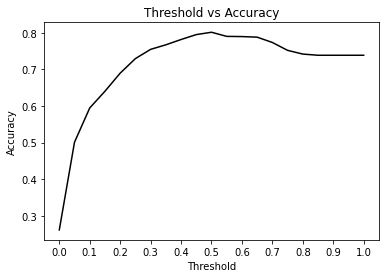

In [24]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

# plt.savefig('04_threshold_accuracy.svg')

plt.show()

In [25]:
churn_small = y_pred_small >= 0.5
(churn_small == y_val).mean()

0.7672043010752688

In [26]:
accuracy_score(y_val, churn_small)

0.7672043010752688

In [27]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)
baseline

array([False, False, False, ..., False, False, False])

In [28]:
accuracy_score(baseline, y_val)

0.7387096774193549

## Confusion Table

A confusion matrix is a table that is used to evaluate the performance of a classification model. It allows you to see the number of true positive, true negative, false positive, and false negative predictions made by the model. The rows represent the actual class of the data, while the columns represent the predicted class.

- the true positive predictions are the cases where the model correctly predicted the positive class
- the true negative predictions are the cases where the model correctly predicted the negative class.
- The false positive predictions are the cases where the model incorrectly predicted the positive class
- the false negative predictions are the cases where the model incorrectly predicted the negative class.

In [30]:
# Makes prediction at threshold 0.5

t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

#Gets the actual target values
actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

# Calculates true positives (cases when we predicted churn correctly)
true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
# Calculates false positives (cases when we predicted churn, but the customers didn't churn)
false_positive = (predict_churn & actual_no_churn).sum() 
# Calculates false negatives (cases when we predicted no churn, but g the customers churned)
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
# Calculates true negatives(cases when we predicted no churn correctly)
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()


In [31]:
confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[1202,  172],
       [ 197,  289]])

In [32]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

-  the model predicts
negative values quite well: 65% of the predictions are true negatives
- it
makes quite a few mistakes of both types: the number of false positives and false negatives is roughly equal (9% and 11%, respectively).

## Precision and Recall

- Both precision and recall are calculated from the values of the confusion table
- They both help us understand the quality of the model in cases of class imbalance
- Precision tells us how many of the positive predictions turned out to be correct. It’s the fraction of correctly predicted positive examples.
- Recals the fraction of correctly classified positive examples among all positive examples.

In [34]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6268980477223427, 0.5946502057613169)

Question :
- Precision: what’s the percent of correct predictions (TP) among customers predicted as churning (TP + FP)?
-  Recall: what’s the percentage correctly predicted as churning (TP) among all
churned customers (TP + FN)?


In [35]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

In [36]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

(0.6268980477223427, 0.5946502057613169)

## ROC AND AUC

TPR AND FPR
-  False positive rate (FPR): the fraction of false positives among all negative
example
-  True positive rate (TPR): the fraction of true positives among all positive
examples

In [39]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [40]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [41]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [42]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


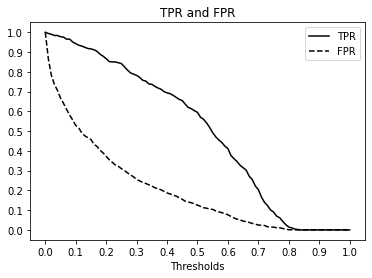

In [43]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

Random Baseline

A random model outputs a random score between 0 and 1

In [44]:
# Fixes the random seed for reproducibility
np.random.seed(1)


# Generates an array with random numbers between 0 and 1
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [45]:
# Defines a function that takes in actual and predicted values
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    # Calculates TPR and FPR using the confusion table numbers
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [46]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,440,1236,46,138,0.905350,0.899563
20,0.2,392,1101,94,273,0.806584,0.801310
30,0.3,339,972,147,402,0.697531,0.707424
40,0.4,288,849,198,525,0.592593,0.617904
50,0.5,239,723,247,651,0.491770,0.526201
60,0.6,193,579,293,795,0.397119,0.421397
70,0.7,152,422,334,952,0.312757,0.307132
80,0.8,98,302,388,1072,0.201646,0.219796
90,0.9,57,147,429,1227,0.117284,0.106987


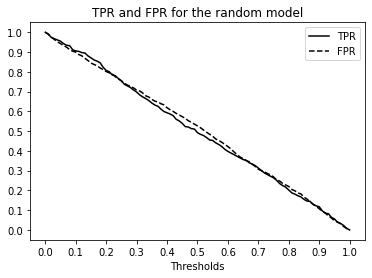

In [47]:
plt.figure(figsize=(6, 4))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')

#plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

The ideal Model - always make correct decision

This model outputs scores in such a way that churning customers always have higher scores than non-churning ones. In other words, the
predicted probability for all churned ones should be higher than the predicted probability for non-churned ones.

In [48]:
# Calculates the number of negative and positive examples in the dataset
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

# Generates an array that first repeats 0s num_neg number of times, followed by 1s repeated num_pos number of times
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
# Generates the predictions of the "model": numbers that grow from 0 in the first cell to 1 in the last
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

# Computes the TPRand FPR curvesfor the classifier
df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,486,1188,0,186,1.000000,0.864629
20,0.2,486,1002,0,372,1.000000,0.729258
30,0.3,486,816,0,558,1.000000,0.593886
40,0.4,486,630,0,744,1.000000,0.458515
50,0.5,486,444,0,930,1.000000,0.323144
60,0.6,486,258,0,1116,1.000000,0.187773
70,0.7,486,72,0,1302,1.000000,0.052402
80,0.8,372,0,114,1374,0.765432,0.000000
90,0.9,186,0,300,1374,0.382716,0.000000


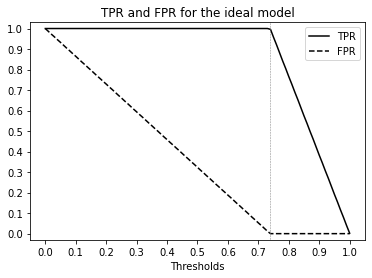

In [49]:
plt.figure(figsize=(6, 4))

plt.plot(df_ideal.threshold, df_ideal.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')

# plt.savefig('04_fpr_tpr_plot_ideal.svg')

plt.show()

From the plot, we can see :
-  Both TPR and FPR start at 100% and end at 0%
-  For thresholds lower than 0.74, we always correctly classify all churning customers
as churning; that’s why TRP stays at 100%. On the other hand, we incorrectly classify some non-churning ones as churning — those are our false positives. As we
increase the threshold, fewer and fewer non-churning customers are classified
as churning, so FPR goes down. At 0.6, we misclassify 258 non-churning customers as churning
-  The threshold of 0.74 is the ideal situation: all churning customers are classified
as churning, and all non-churning are classified as non-churning; that’s why
TPR is 100% and FPR is 0%
-  Between 0.74 and 1.0, we always correctly classify all non-churning customers,
so FPR stays at 0%. However, as we increase the threshold, we start incorrectly
classifying more and more churning customers as non-churning, so TPR goes
down. At 0.8, 114 out of 446 churning customers are incorrectly classified
as non-churning. Only 372 predictictions are correct, so TPR is 76%

ROC CURVE

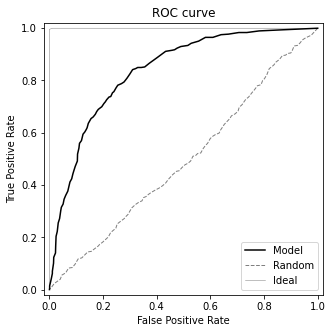

In [50]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1,
         linestyle='dashed', alpha=0.5, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5,
         linestyle='solid', alpha=0.5, label='Ideal')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve_with_baselines.svg')

plt.show()

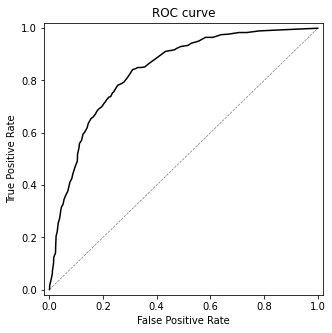

In [51]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve.svg')

plt.show()

Using Scikit-Learn for plotting the ROC curve

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [55]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

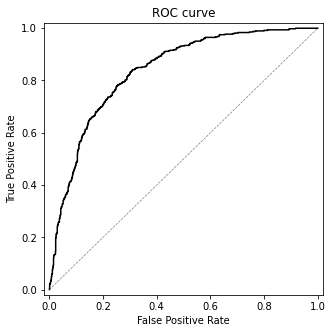

In [56]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

AUC: Area under the ROC curve

In [57]:
df_scores_small = tpr_fpr_dataframe(y_val, y_pred_small)

In [58]:
auc(df_scores.fpr, df_scores.tpr)

0.8359001084215382

In [59]:
auc(df_scores_small.fpr, df_scores_small.tpr)

0.7620304478827848

Comparing multiple models with ROC curves

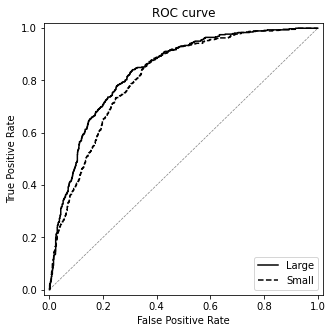

In [60]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5, 5))

plt.plot(fpr_large, tpr_large, color='black', linestyle='solid', label='Large')
plt.plot(fpr_small, tpr_small, color='black', linestyle='dashed', label='Small')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')
plt.legend(loc='lower right')

plt.show()

In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
roc_auc_score(y_val, y_pred)

0.8363381374257972

In [63]:
roc_auc_score(y_val, y_pred_small)

0.8129399009230807

Interpretation of AUC: the probability that a randomly chosen positive example
ranks higher than a randomly chosen negative example

In [65]:
# Selects the score for all non-churning customers
neg = y_pred[y_val == 0]
# Selects the score for all churning customers
pos = y_pred[y_val == 1]

np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)
(pos[pos_choice] > neg[neg_choice]).mean()

0.8356

An AUC of 0.9 is indicative of a reasonably good model; 0.8 is
okay, 0.7 is not very performant, and 0.6 indicates quite poor performance.

- ROC curves and AUC scores tell us how well the model separates positive and negative
examples
- AUC has a nice probabilistic interpretation: it tells us what the probability is that a randomly selected positive example will have a score higher
than a randomly selected negative example

## K-fold cross-validation

- K-fold cross-validation is a method used to validate the performance of a machine learning model. It involves randomly dividing the dataset into k groups or "folds", and training the model on k-1 of the folds and evaluating it on the remaining one. 
- This process is then repeated k times with a different fold being used as the test set in each iteration. The performance measure is then averaged over all k iterations. 
- This method helps to reduce the variance in the model's performance, as it gives an estimate of the model's performance on unseen data by using all of the data for training and all of the data for testing. 
- It is particularly useful when the dataset is small, as it allows for training and testing on all of the data, rather than just a small portion.

In [69]:
# Applies one-hot encoding
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    # Trains the model
    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [70]:
from sklearn.model_selection import KFold

In [72]:
# Uses it to split the data into 10 parts
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [73]:
# Creates a list for storing the results
aucs = []

# Iterates over the 10 different splits of the data
for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.churn.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [74]:
np.array(aucs).round(3)

array([0.849, 0.841, 0.859, 0.833, 0.824, 0.841, 0.844, 0.822, 0.845,
       0.861])

In [75]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


Tuning the parameter `C`

In [76]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

In [77]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.008
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


Full retrain

In [78]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858
